In [259]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [260]:
def flagger (data):

    #data = "2012,AO,Artisanal opportunities,future,0,Global average,80.74,"
    #data[r][c]
    #counts

    scenerioCounter=0
    goalsCounter=0
    longGoalCounter=0
    dimensionCounter=0
    regionIDCounter=0
    region_nameCounter=0
    valueCounter=0


    for i in range(len(data)):


        if (not(data[i][0].isdigit())):
            scenerioCounter=scenerioCounter+1

            #print("Scenerio: " + str(data[i][0]))

        if (not(data[i][1].isalpha())):
            goalsCounter=goalsCounter+1

            #print("goals: " + str(data[i][1]))

        if (not(data[i][2].replace(" ","").replace("&","").replace("(","").replace(")","").isalpha())):
            longGoalCounter=longGoalCounter+1

            #print("long goal: " + str(data[i][2]))

        if (not(data[i][3].isalpha())):
            dimensionCounter=dimensionCounter+1

            #print("dimension " + str(data[i][3]))

        if (not(data[i][4].isdigit())):
            regionIDCounter=regionIDCounter+1

            #print("region ID: " + str(data[i][4]))

        if (not(data[i][5].replace(" ","").replace("_","").replace("(","").replace(")","").replace("-","").isalpha())):
            region_nameCounter=region_nameCounter+1

            #print("region name: " + str(data[i][5]))

        if (not(data[i][6].replace(".","").replace("-","").isdigit())):
            valueCounter=valueCounter+1

            #print("value: " + str(data[i][6]))

    return scenerioCounter, goalsCounter, longGoalCounter, dimensionCounter, regionIDCounter, region_nameCounter, valueCounter

dataset = open('DataTestNI.txt')
lines = dataset.readlines()
row = []
for line in lines:

    row.append(line.strip().split(","))

typeerror_count = flagger(row)

In [261]:
import pandas as pd
import numpy as np

In [262]:
# Import excel data into python

# OHIdata = 'OHIData.xlsx'
# OHI = pd.read_excel(OHIdata)

OHI = pd.read_csv('OHIDataSet.csv')

In [263]:
colheaders = list(OHI.columns.values)

In [264]:
# Check number of missing/NA values ~ if over 80% then remove

unwanted = [column for column in OHI.columns 
                if OHI[column].isna().sum()/len(OHI[column]) > 0.2]
unwanted = "".join(unwanted)
OHI = OHI.drop(unwanted, axis=1)

In [265]:
# Verify if colnames match

from collections import Counter

des_colnames = ['scenario','goals','long_goal','dimension','region_id','region_name','value']
colheaders = list(OHI.columns.values)

def compare(s, t):
    return Counter(s) == Counter(t)

col_ver = compare(des_colnames, colheaders)

In [266]:
# List number of missing/NA in other cases

NAcount = OHI.isna().sum()/len(OHI)

In [267]:
# If there are any fully blank entries remove the rows

OHIpre = len(OHI)
OHI = OHI.dropna(how='all')
OHIpost = len(OHI)
diff = OHIpre - OHIpost

In [268]:
contain_uniqueid = (len(OHI.iloc[:, 0].unique()) == len(OHI),
    len(OHI.iloc[:, 1].unique()) == len(OHI),
    len(OHI.iloc[:, 2].unique()) == len(OHI),
    len(OHI.iloc[:, 3].unique()) == len(OHI),
    len(OHI.iloc[:, 4].unique()) == len(OHI),
    len(OHI.iloc[:, 5].unique()) == len(OHI),
    len(OHI.iloc[:, 6].unique()) == len(OHI))

contain_uniqueid = contain_uniqueid.count("True")

In [269]:
# Adding column for unique ID ~ combine all non-numeric values

OHI['unique_key'] = OHI[['scenario','goals','dimension','region_id']].astype(str).sum(axis=1)

In [270]:
# Create  scoring system

# Are there any mismatched types
if sum(typeerror_count) == 0:
    score1 = 1
else:
    score1 = 0

if col_ver == True:
    score2 = 1
else:
    score2 = 0
    
score3 = 1 -sum(NAcount)/len(OHI.columns)

if unwanted == "NA":
    score4 = 1
else:
    score4 = 0

if diff == 0:
    score5 = 1
else:
    score5 = 0
    
if contain_uniqueid == 1:
    score6 = 1
else:
    score6 = 0

In [271]:
scores = score1, score2, score3, score4, score5, score6

In [272]:
totalscore = np.mean(scores)
totalscore_opp = 1 - totalscore

# Automated Data Fitness Report

## Fitness Score:

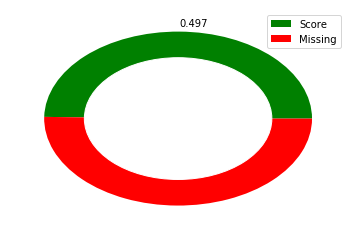

In [273]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('GTK',warn=False, force=True)

totalscore = np.round(totalscore, decimals=3)

size_of_groups=[totalscore, totalscore_opp]
names=totalscore, ''
cols = 'green', 'red'
plt.pie(size_of_groups, labels=names, colors = cols)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(["Score", "Missing"])
plt.show()

# Add legend

## PASS-FAIL Evaluation:

In [274]:
if scores.count(0) >=1:
    eval = "FAIL"
else:
    eval = "PASS"
    
print("This dataset recieves a", eval)
print("")
print("The dataset needs to be reassessed.")

This dataset recieves a FAIL

The dataset needs to be reassessed.


## Flagged Controls:

In [275]:
numflags = scores.count(0)
print('The number of flagged controls is:', numflags)

The number of flagged controls is: 3


In [276]:
# List of flagged controls

indexes = [index for index in range(len(scores)) if scores[index] == 0]
scorenames = ["Type mismatch", "Header mismatch", "NA column", "Extra columns", "NA rows", "Missing unique ID"]

In [277]:
flags = [scorenames[i] for i in indexes]
print('The areas that were flagged are', flags)

The areas that were flagged are ['Type mismatch', 'Extra columns', 'Missing unique ID']


In [278]:
if(score1 == 1):
    score1eval = "FAIL"
else:
    score1eval = "PASS"

if (score2 == 1):
    score2eval = "FAIL"
else:
    score2eval = "PASS"

if (score3 <= 0.8):
    score3eval = "FAIL"
else:
    score3eval = "PASS"

if (score4 == 1):
    score4eval = "FAIL"
else:
    score4eval = "PASS"

if (score5 == 1):
    score5eval = "FAIL"
else:
    score5eval = "PASS"

if (score6 == 1):
    score6eval = "FAIL"
else:
    score6eval = "PASS"

## Criteria Results:

In [279]:
print("Extra columns: " + score4eval)
print("Header mismatch: " + score2eval)
print("Missing unique ID: " + score6eval)
print("NA column: " + score3eval)
print("NA rows: " + score5eval)
print("Type mismatch: " + score1eval)

Extra columns: PASS
Header mismatch: FAIL
Missing unique ID: PASS
NA column: PASS
NA rows: FAIL
Type mismatch: PASS


In [280]:
metadata_file = open("METADATA.txt").read().split()

## F.A.I.R Criteria:

In [281]:
print('TO BE FINDABLE:')
print('')
print('F1: (meta)data are assigned a globally unique and eternally persistent identifier.')
print('')
print('')

listsearch = ['unique', 'id', 'key']
result =  any(elem in metadata_file  for elem in listsearch)
 
if result:
    print("Yes, the metadata contains a unique ID.")
    F = 1
else:
    print("No, the metadata does not contain a unique ID.")
    F = 0

TO BE FINDABLE:

F1: (meta)data are assigned a globally unique and eternally persistent identifier.


No, the metadata does not contain a unique ID.


In [282]:
print('TO BE ACCESSIBLE:')
print('')
print('A1: (meta)data are retrievable by their identifier using a standardized communications protocol.')
print('')
print('')

import random
rowcheck = random.randint(1,len(OHI))

if OHI.iloc[rowcheck, 7] in OHI.iloc[rowcheck, :][7]:
    print('The rows are uniquely identifiable by the "unique_key" entry.')
    A = 1
else:
    print('The rows are not uniquely identifiable by the "unique_key" entry.')
    A = 0

TO BE ACCESSIBLE:

A1: (meta)data are retrievable by their identifier using a standardized communications protocol.


The rows are uniquely identifiable by the "unique_key" entry.


In [283]:
print('TO BE INTEROPERABLE:')
print('')
print('I3. (meta)data include qualified references to other (meta)data.')
print('')
print('')

listsearch = ['external', 'metadata']
result =  all(elem in metadata_file  for elem in listsearch)
 
if result:
    print("Yes, there is a reference to external metadata.")
    I = 1
else:
    print("No, there are no references to external metadata.")
    I = 0

TO BE INTEROPERABLE:

I3. (meta)data include qualified references to other (meta)data.


No, there are no references to external metadata.


In [284]:
print('TO BE RE-USABLE:')
print('')
print('R1.1. (meta)data are released with a clear and accessible data usage license.')
print('')
print('')

listsearch = ['license']
result =  any(elem in metadata_file  for elem in listsearch)
 
if result:
    print("Yes, the metadata contains an appropriate license.")
    R = 1
else:
    print("No, the metadata does not contain an appropriate license.")
    R = 0

TO BE RE-USABLE:

R1.1. (meta)data are released with a clear and accessible data usage license.


No, the metadata does not contain an appropriate license.


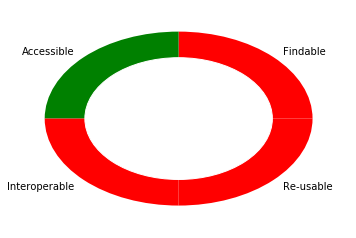

In [285]:
# Vizualization highlighting the FAIR scores
# `

if F is 1:
    colF='green'
else:
    colF='red'

if A is 1:
    colA='green'
else:
    colA='red'

if I is 1:
    colI='green'
else:
    colI='red'

if R is 1:
    colR='green'
else:
    colR='red'
    
size_of_groups=[0.25, 0.25, 0.25, 0.25]
names="Findable", "Accessible", "Interoperable", "Re-usable"
cols = colF, colA, colI, colR
plt.pie(size_of_groups, labels=names, colors = cols)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend(["Score", "Missing"])
plt.show()

## Descriptive Statistics:

In [286]:
print('Total entries:', len(OHI))
print('Total countries:', len(OHI.iloc[:, 4].unique()) )

Total entries: 146196
Total countries: 222


In [287]:
print('Descriptive statistics for all measurements:')

Descriptive statistics for all measurements:


In [288]:
pd.DataFrame(OHI.iloc[:, 6]).describe()

,value
count,123313.000000
mean,51.606179
std,33.835575
min,-1.000000
25%,24.550000
50%,56.150000
75%,80.810000
max,100.000000
